In [0]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [41]:
import sys
import keras
print('python:{}'.format(sys.version))
print('keras:{}'.format(keras.__version__))

python:3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
keras:2.2.5


In [0]:
(X_train, y_train),(X_test, y_test)=cifar10.load_data()

In [43]:
print('training images:{}'.format(X_train.shape))
print('testing images:{}'.format(X_test.shape))

training images:(50000, 32, 32, 3)
testing images:(10000, 32, 32, 3)


In [44]:
print(X_train[0].shape)

(32, 32, 3)


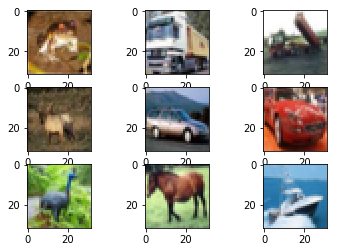

In [45]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img=X_train[i].transpose([0,1,2])
    plt.imshow(img)
    
plt.show()    

In [0]:
seed=6
np.random.seed(seed)

(X_train, y_train),(X_test, y_test)=cifar10.load_data()

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train /=255.0
X_test /=255.0

In [47]:
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [48]:
Y_train=np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)
num_class=Y_test.shape[1]
print(num_class)

print(Y_train.shape)
print(Y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]






---> ALL CNN 

The ALL-CNN-C network used for classification on CIFAR-10

Model-c

* Input 32*32 RGB image
* 3*3 conv. 96 ReLU
* 3*3 conv. 96 ReLU
* 3*3 max-pooling stride 2
* 3*3 conv.192 ReLU
* 3*3 conv.192 ReLU
* 3*3 max-pooling stride 2
* 3*3 conv.192 RelU
* 1*1 conv.192 RelU
* 1*1 conv. 10 ReLU
* Global averaging over 6*6 spatial dimensions
* 10 or 100-way softmax


In [0]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Dropout, Activation, GlobalAveragePooling2D
from keras.optimizers import SGD

In [0]:
def allcnn(weights=None):
    
    model=Sequential()
    
    # add model layers
    model.add(Conv2D(96,(3,3), padding='same', input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same', strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same', strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1),padding='valid'))
    
    #global level pooling layer with software activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    #load weights
    if weights:
        model.load_weights(weights)
        
    #return model
    return model
    


In [52]:
from google.colab import files
uploaded = files.upload()


Saving all_cnn_weights_0.9088_0.4994.hdf5 to all_cnn_weights_0.9088_0.4994 (2).hdf5


In [53]:
learning_rate=0.01
weight_decay= 1e-6
momentum=0.9

weights='all_cnn_weights_0.9088_0.4994.hdf5'
model=allcnn(weights)

sgd=SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])

print(model.summary())

scores=model.evaluate(X_test, Y_test, verbose=1)
print('Accuracy:{}'.format(scores[1]))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 192)      

In [0]:
classes=range(0,10)

names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

class_labels=dict(zip(classes,names))

In [55]:
batch=X_test[100:109]
labels=np.argmax(Y_test[100:109],axis=-1)

predictions=model.predict(batch, verbose=1)

9/9 [==============================] - 0s 10ms/step


In [56]:
print(predictions)

[[4.5647404e-18 1.0580944e-20 1.8923134e-10 2.1411485e-11 9.9999928e-01
  2.8037709e-07 3.1479029e-13 4.2382177e-07 1.3699504e-19 1.2096835e-18]
 [2.1191630e-16 2.0387947e-17 1.5672766e-09 5.3581920e-07 1.6256203e-10
  9.9999940e-01 1.6712586e-09 2.0782505e-08 3.6550979e-15 3.5129402e-16]
 [1.2720516e-30 5.0273257e-28 5.1540610e-24 3.6051960e-21 1.0875389e-27
  8.1523708e-22 1.0000000e+00 1.1050866e-27 6.1924613e-32 1.2273912e-23]
 [1.5143828e-16 4.7667238e-18 2.2583779e-09 1.0000000e+00 4.3480382e-11
  1.6883953e-12 4.5315913e-13 2.6686443e-16 7.2660253e-19 6.2049703e-17]
 [8.2496687e-36 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 9.3555905e-36 8.6863322e-30 8.2188497e-22]
 [5.9702689e-24 1.0000000e+00 7.5488142e-27 8.0230521e-27 1.9714703e-30
  2.7339758e-29 7.2189586e-31 5.5681431e-27 1.6187176e-26 1.1906764e-13]
 [6.4563300e-18 2.9643555e-20 1.0046188e-11 9.9999988e-01 6.0157613e-13
  9.1110458e-08 7.8874650e-12 1.1608745e-15 7.8591060e-21 

In [57]:
for image in predictions:
    print(np.sum(image))

1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [58]:
class_result=np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


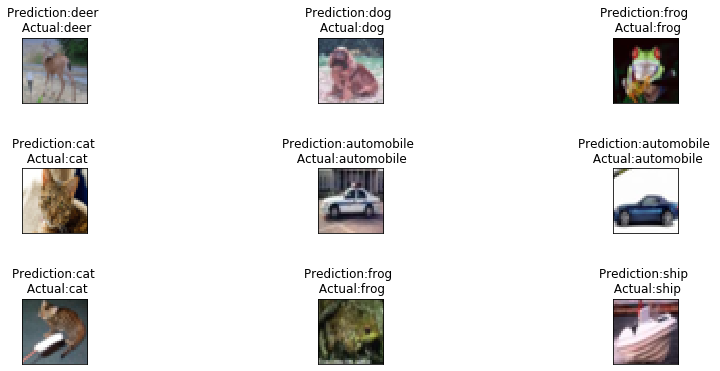

In [59]:
fig, axs=plt.subplots(3,3,figsize=(15,6))
fig.subplots_adjust(hspace=1)

axs=axs.flatten()

for i,img in enumerate(batch):
    for key,value in class_labels.items():
        if class_result[i]==key:
            title='Prediction:{} \n Actual:{}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    axs[i].imshow(img.transpose([0,1,2]))
    
    
plt.show()    